In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
url1='https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv'
url2='https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv'
trained_url=pd.read_csv(url1)
test_url=pd.read_csv(url2)

In [3]:
trained_url

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
test_url

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [5]:
trained_url.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
test_url.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [7]:
trained_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
test_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [11]:
trained_url.shape

(31647, 18)

In [12]:
trained_url.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [10]:
test_url.shape

(13564, 17)

In [14]:
test_url.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [15]:
trained_url.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


In [16]:
test_url.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,13564.000000,13564.000000,13564,13564,13564,13564,13564.000000,13564,13564,13564,13564.000000,13564,13564.000000,13564.000000,13564.000000,13564.000000,13564
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown
freq,NaN,NaN,2890,8119,6978,13334,NaN,7546,11451,8862,NaN,4097,NaN,NaN,NaN,NaN,11030
mean,22704.057726,40.887128,NaN,NaN,NaN,NaN,1358.496535,NaN,NaN,NaN,15.738646,NaN,258.278679,2.759510,41.648555,0.594441,NaN
std,12994.043329,10.604108,NaN,NaN,NaN,NaN,3082.940623,NaN,NaN,NaN,8.288174,NaN,258.488648,3.060928,101.985178,1.998193,NaN
min,1.000000,18.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,11546.000000,33.000000,NaN,NaN,NaN,NaN,71.000000,NaN,NaN,NaN,8.000000,NaN,102.000000,1.000000,-1.000000,0.000000,NaN
50%,22782.000000,39.000000,NaN,NaN,NaN,NaN,445.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,33974.250000,48.000000,NaN,NaN,NaN,NaN,1413.250000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN


In [18]:
trained_duplicated=trained_url.duplicated().sum()

In [20]:
print(f'dataset having {trained_duplicated} duplicated values')

dataset having 0 duplicated values


In [21]:
test_duplicated=test_url.duplicated().sum()
print(f'dataset having {test_duplicated} duplicated values')

dataset having 0 duplicated values


In [23]:
trained_url.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [24]:
test_url.isna().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [5]:
trained_url[trained_url==0].count()

ID                0
age               0
job               0
marital           0
education         0
default           0
balance        2470
housing           0
loan              0
contact           0
day               0
month             0
duration          1
campaign          0
pdays             0
previous      25924
poutcome          0
subscribed        0
dtype: int64

In [6]:
test_url[test_url==0].count()

ID               0
age              0
job              0
marital          0
education        0
default          0
balance       1044
housing          0
loan             0
contact          0
day              0
month            0
duration         2
campaign         0
pdays            0
previous     11030
poutcome         0
dtype: int64

In [5]:
trained_url['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [6]:
trained_url['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [7]:
trained_url['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

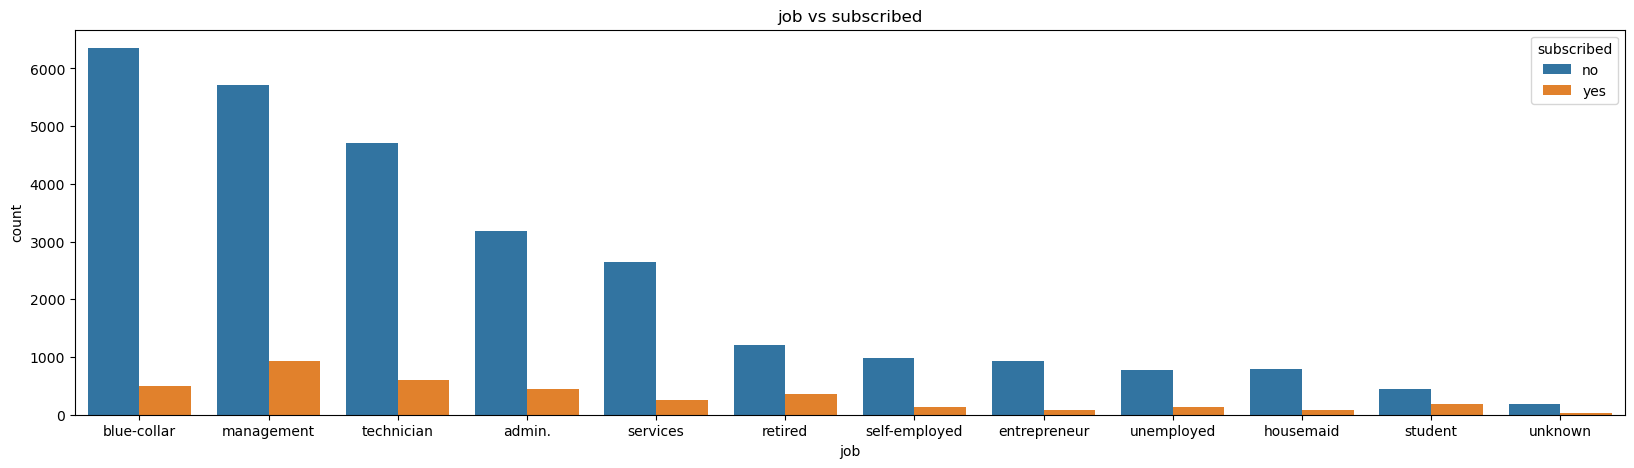

In [90]:
plt.figure(figsize=(20,5))
sns.countplot(x='job',hue='subscribed',data=trained_url,order=trained_url['job'].value_counts().index)
plt.title('job vs subscribed')
plt.show()

<Axes: xlabel='subscribed', ylabel='Count'>

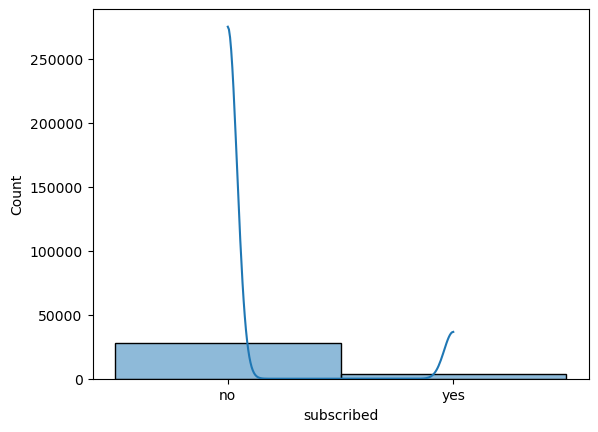

In [19]:
sns.histplot(trained_url['subscribed'],kde=True)

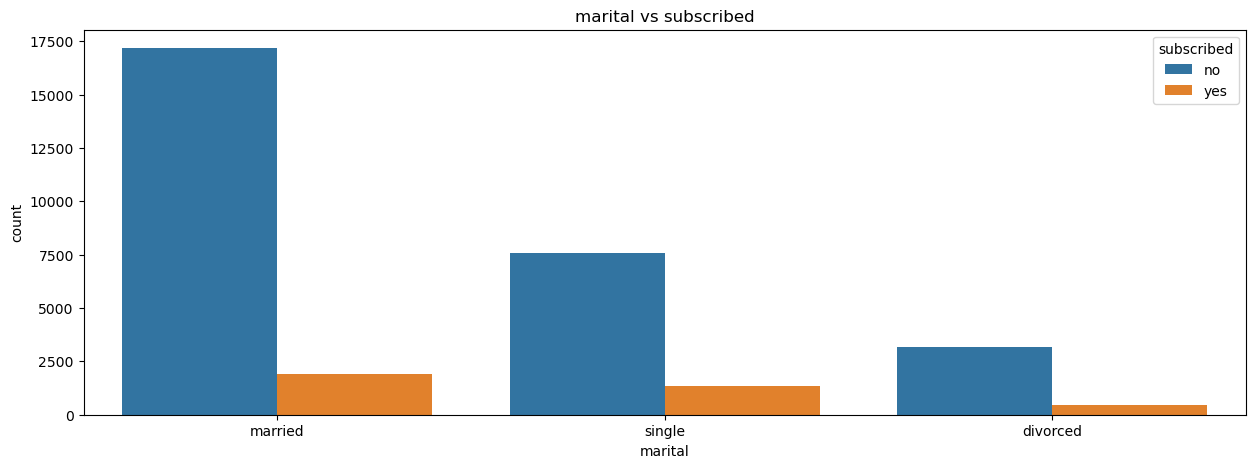

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital',hue='subscribed',data=trained_url,order=trained_url['marital'].value_counts().index)
plt.title('marital vs subscribed')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

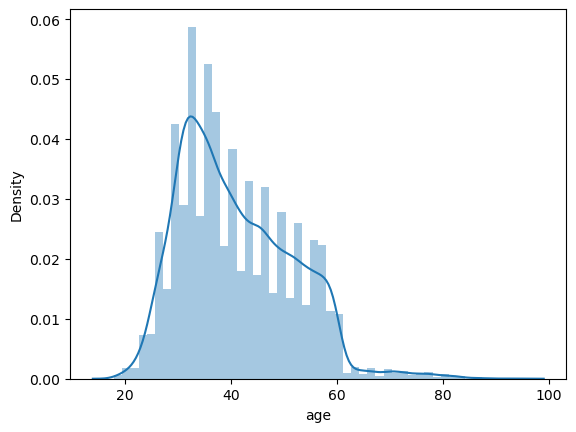

In [24]:
sns.distplot(trained_url['age'])

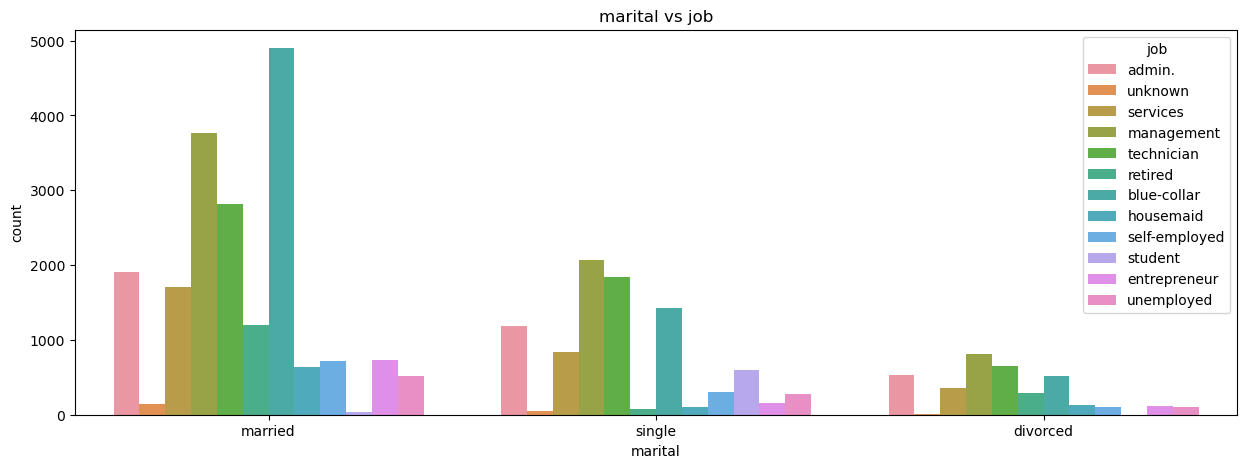

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital',hue='job',data=trained_url,order=trained_url['marital'].value_counts().index)
plt.title('marital vs job')
plt.show()

In [32]:
trained_url.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

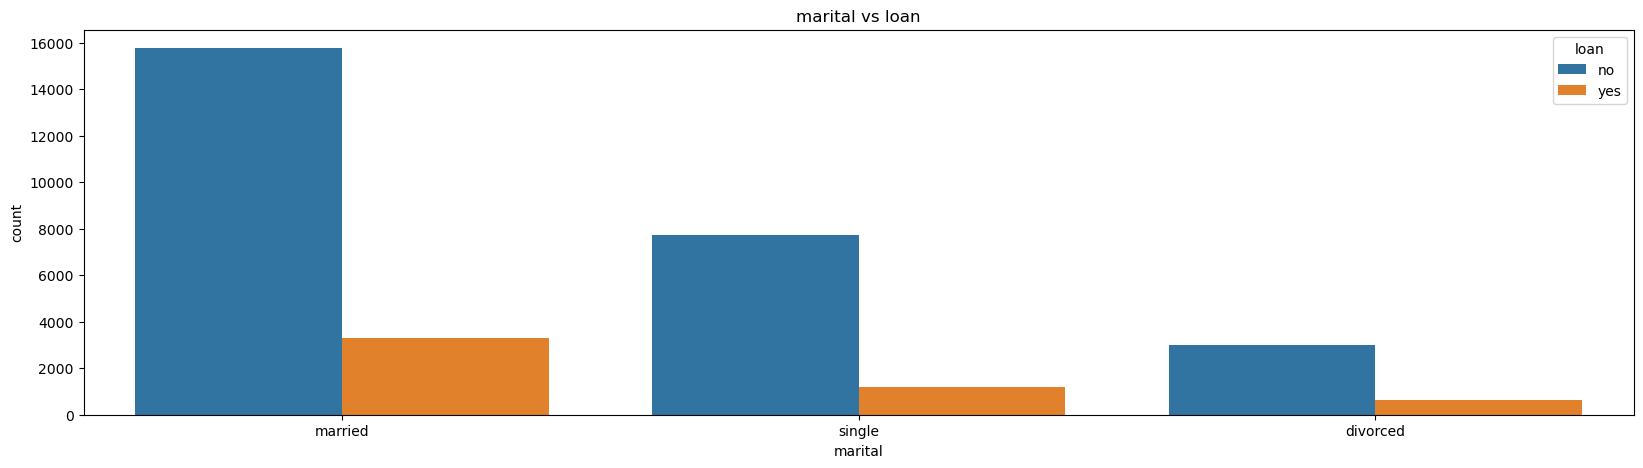

In [35]:
plt.figure(figsize=(20,5))
sns.countplot(x='marital',hue='loan',data=trained_url,order=trained_url['marital'].value_counts().index)
plt.title('marital vs loan')
plt.show()

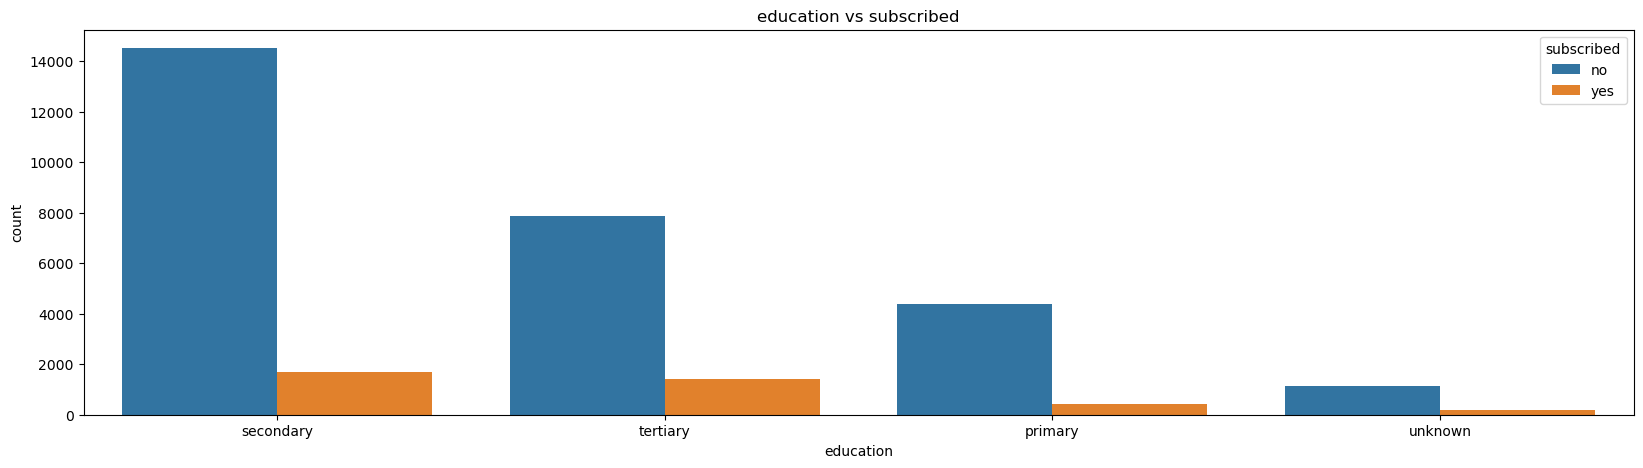

In [36]:
plt.figure(figsize=(20,5))
sns.countplot(x='education',hue='subscribed',data=trained_url,order=trained_url['education'].value_counts().index)
plt.title('education vs subscribed')
plt.show()

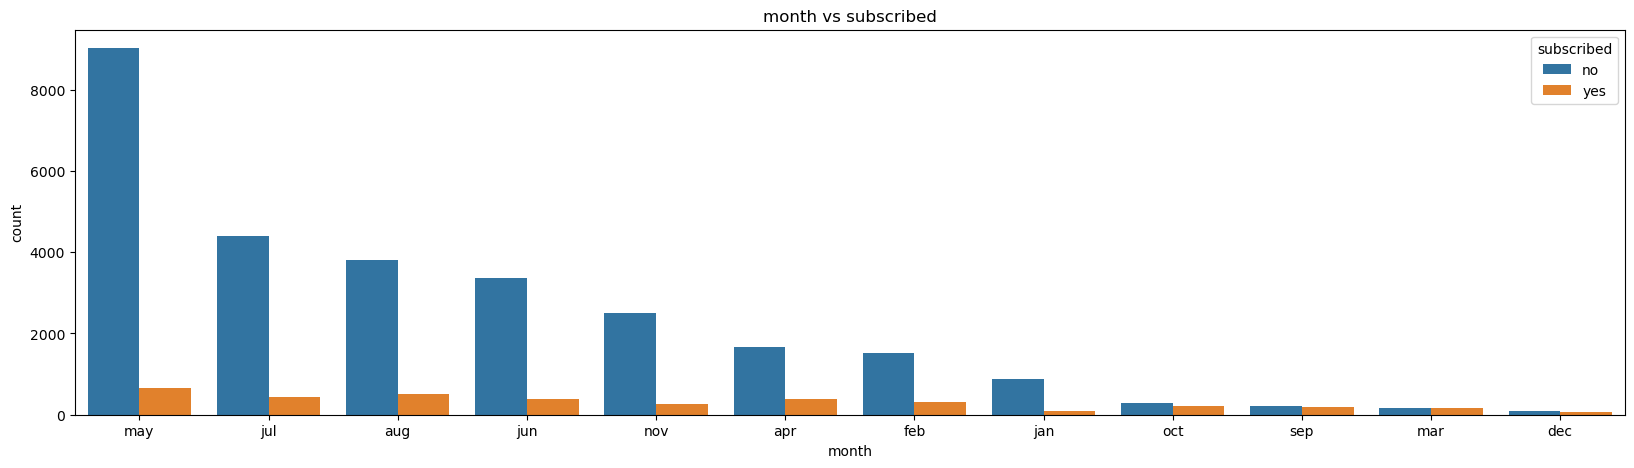

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(x='month',hue='subscribed',data=trained_url,order=trained_url['month'].value_counts().index)
plt.title('month vs subscribed')
plt.show()

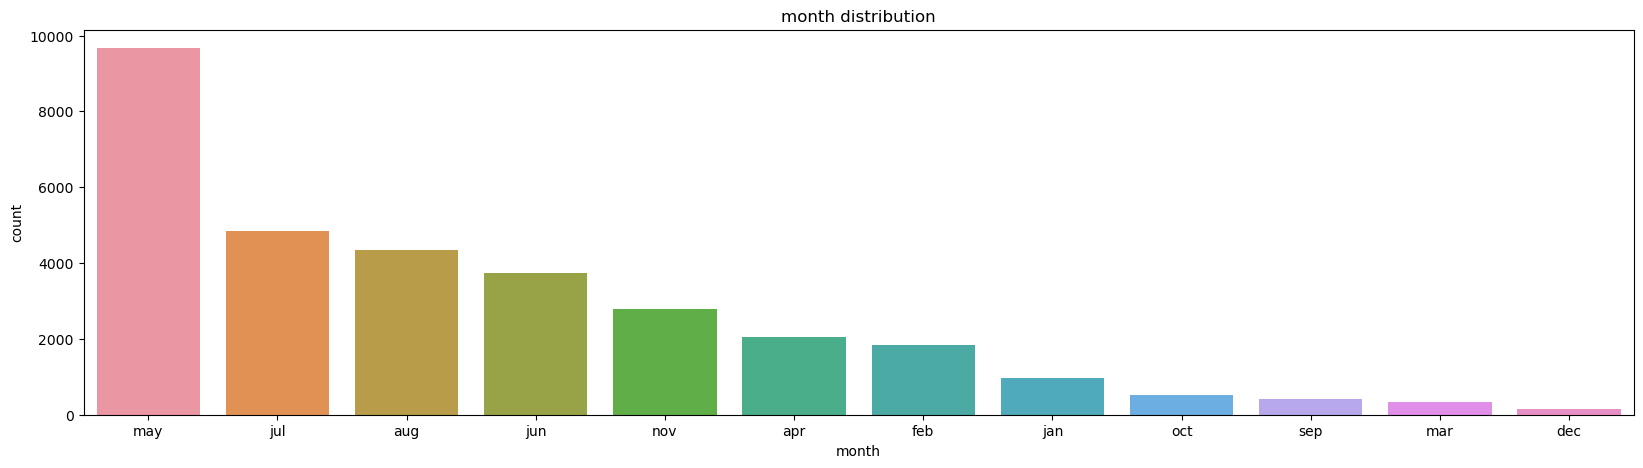

In [39]:
plt.figure(figsize=(20,5))
sns.countplot(x='month',data=trained_url,order=trained_url['month'].value_counts().index)
plt.title('month distribution')
plt.show()

In [44]:
trained_url['balance'].value_counts()

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64

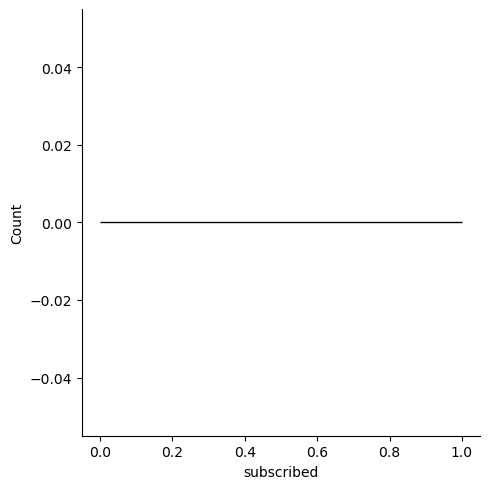

In [48]:
trained_url['subscribed']=trained_url['subscribed'].map({'yes':1,'no':0})
sns.displot(trained_url['subscribed'])

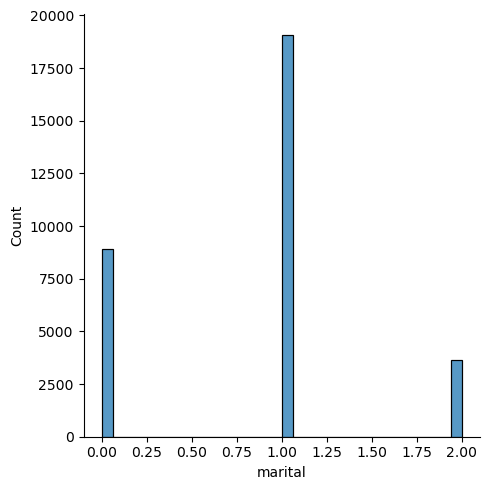

In [49]:
trained_url['marital']=trained_url['marital'].map({'married':1,'single':0,'divorced':2})
sns.displot(trained_url['marital'])

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

trained_url['job'] = le.fit_transform(trained_url['job'])
trained_url['education'] = le.fit_transform(trained_url['education'])
trained_url['contact'] = le.fit_transform(trained_url['contact'])
trained_url['housing'] = le.fit_transform(trained_url['housing'])
trained_url['default'] = le.fit_transform(trained_url['default'])
trained_url['poutcome'] = le.fit_transform(trained_url['poutcome'])
trained_url['month'] = le.fit_transform(trained_url['month'])
print(trained_url)
print('\n')
test_url['job'] = le.fit_transform(test_url['job'])
test_url['education'] = le.fit_transform(test_url['education'])
test_url['contact'] = le.fit_transform(test_url['contact'])
test_url['housing'] = le.fit_transform(test_url['housing'])
test_url['default'] = le.fit_transform(test_url['default'])
test_url['poutcome'] = le.fit_transform(test_url['poutcome'])
test_url['month'] = le.fit_transform(test_url['month'])
test_url['marital'] = test_url['marital'].map({'married':1,'single':0,'divorced':2})
test_url
print(test_url)


          ID  age  job  marital  education  default  balance  housing loan  \
0      26110   56    0        1          3        0     1933        0   no   
1      40576   31   11        1          1        0        3        0   no   
2      15320   27    7        1          1        0      891        1   no   
3      43962   57    4        2          2        0     3287        0   no   
4      29842   31    9        1          1        0      119        1   no   
...      ...  ...  ...      ...        ...      ...      ...      ...  ...   
31642  36483   29    4        0          2        0        0        1   no   
31643  40178   53    4        2          2        0      380        0  yes   
31644  19710   32    4        0          2        0      312        0   no   
31645  38556   57    9        1          1        0      225        1   no   
31646  14156   55    4        2          1        0      204        1   no   

       contact  day  month  duration  campaign  pdays  previous

In [14]:
def identify_variables(trained_url):
    categorical_vars = trained_url.select_dtypes(include=['object','category','bool']).columns.tolist()
    numerical_vars = trained_url.select_dtypes(include=['number']).columns.tolist()
    return categorical_vars, numerical_vars

In [18]:
categorical,numerical=identify_variables(trained_url)

In [19]:
print("Categorical Variables:", categorical)
print("Numerical Variables:", numerical)

Categorical Variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numerical Variables: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [29]:
len(trained_url)

31647

In [30]:
def identify_variables(test_url):
    categorical_vars = test_url.select_dtypes(include=['object','category','bool']).columns.tolist()
    numerical_vars = test_url.select_dtypes(include=['number']).columns.tolist()
    return categorical_vars, numerical_vars
categorical,numerical=identify_variables(test_url)
print("Categorical Variables:", categorical)
print("Numerical Variables:", numerical)                                         

Categorical Variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Variables: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


<Axes: xlabel='default', ylabel='balance'>

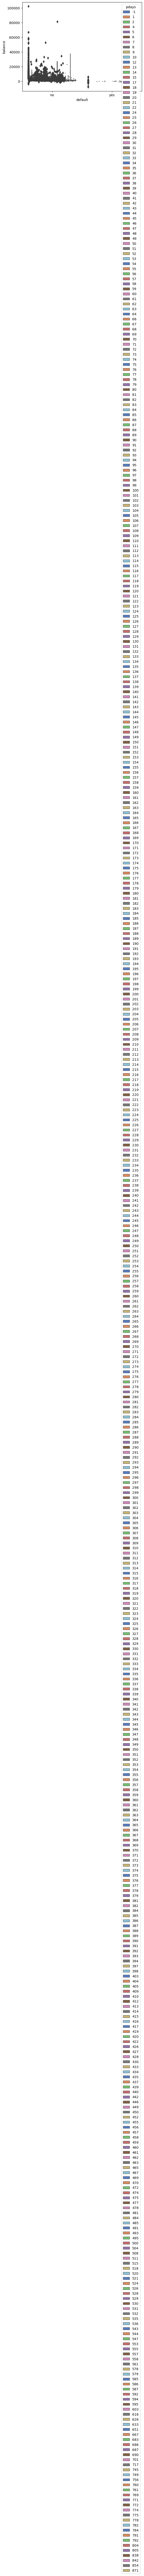

In [32]:
sns.boxplot(x="default", y="balance", hue="pdays",data=trained_url, palette="muted")

In [33]:
normalized_frequency=trained_url['subscribed'].value_counts(normalize=True)

In [34]:
normalized_frequency

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

In [39]:
df=trained_url

In [40]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [43]:
main_df=pd.DataFrame(trained_url)

In [44]:
df_copy=main_df.copy()

In [45]:
print('Main DataFrame:')
print(main_df)
print('\ncopy of DataFrame:')
print(df_copy)

Main DataFrame:
          ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  d

In [47]:
df_copy['subscribed'].replace({'yes':1,'no':0},inplace=True)

In [54]:
df_copy

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0


In [48]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 4.3+ MB


In [50]:
df_copy.corr

<bound method DataFrame.corr of           ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    conta

In [51]:
df_copy.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


In [56]:
numerics_df=df_copy.select_dtypes(include=['number'])
df_copy_corr=numerics_df.corr()
df_copy_corr

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


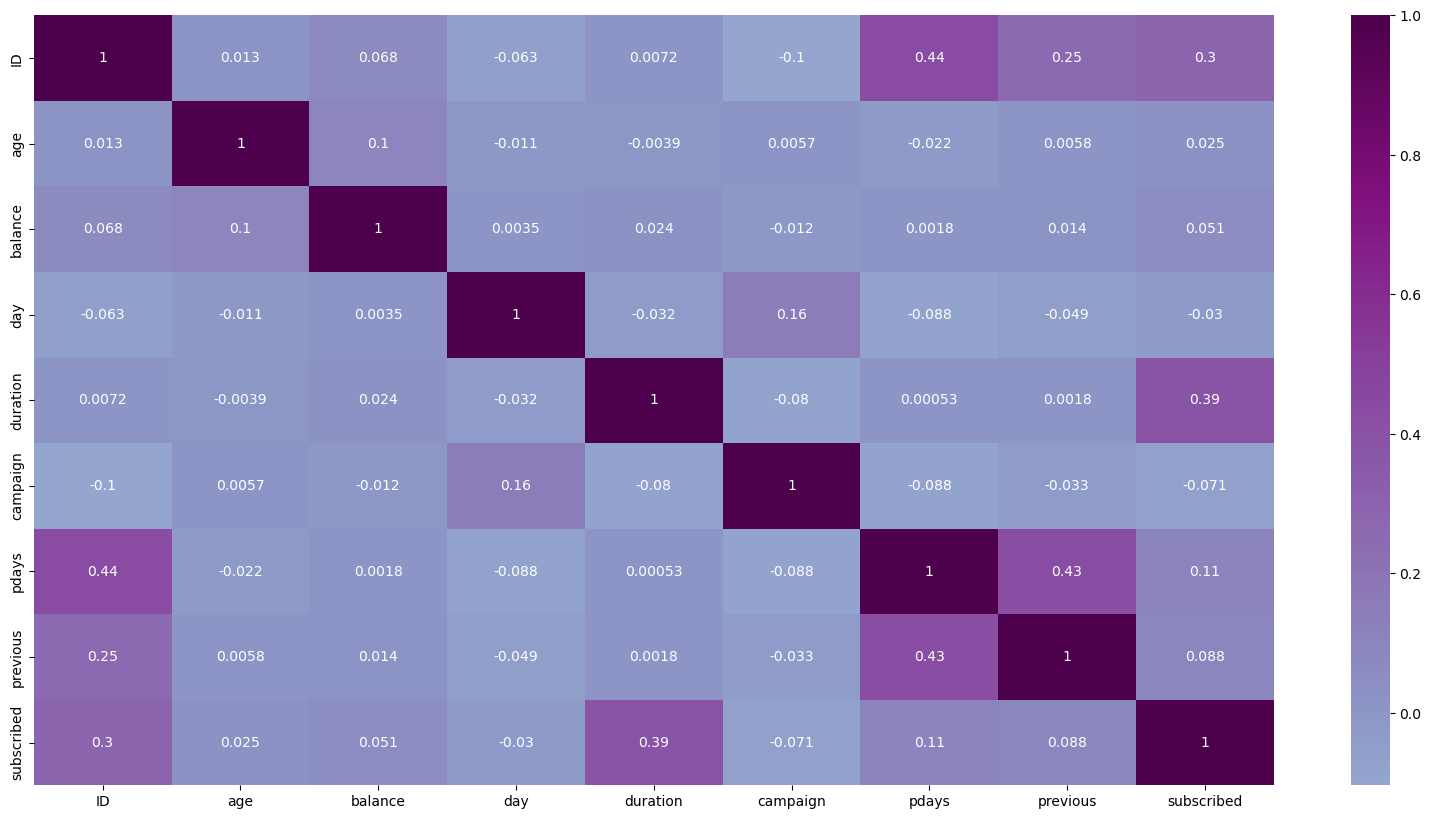

In [78]:
plt.figure(figsize=(20,10))
sns.heatmap(df_copy.corr(),annot=True,cmap='BuPu',center=0)
plt.show()

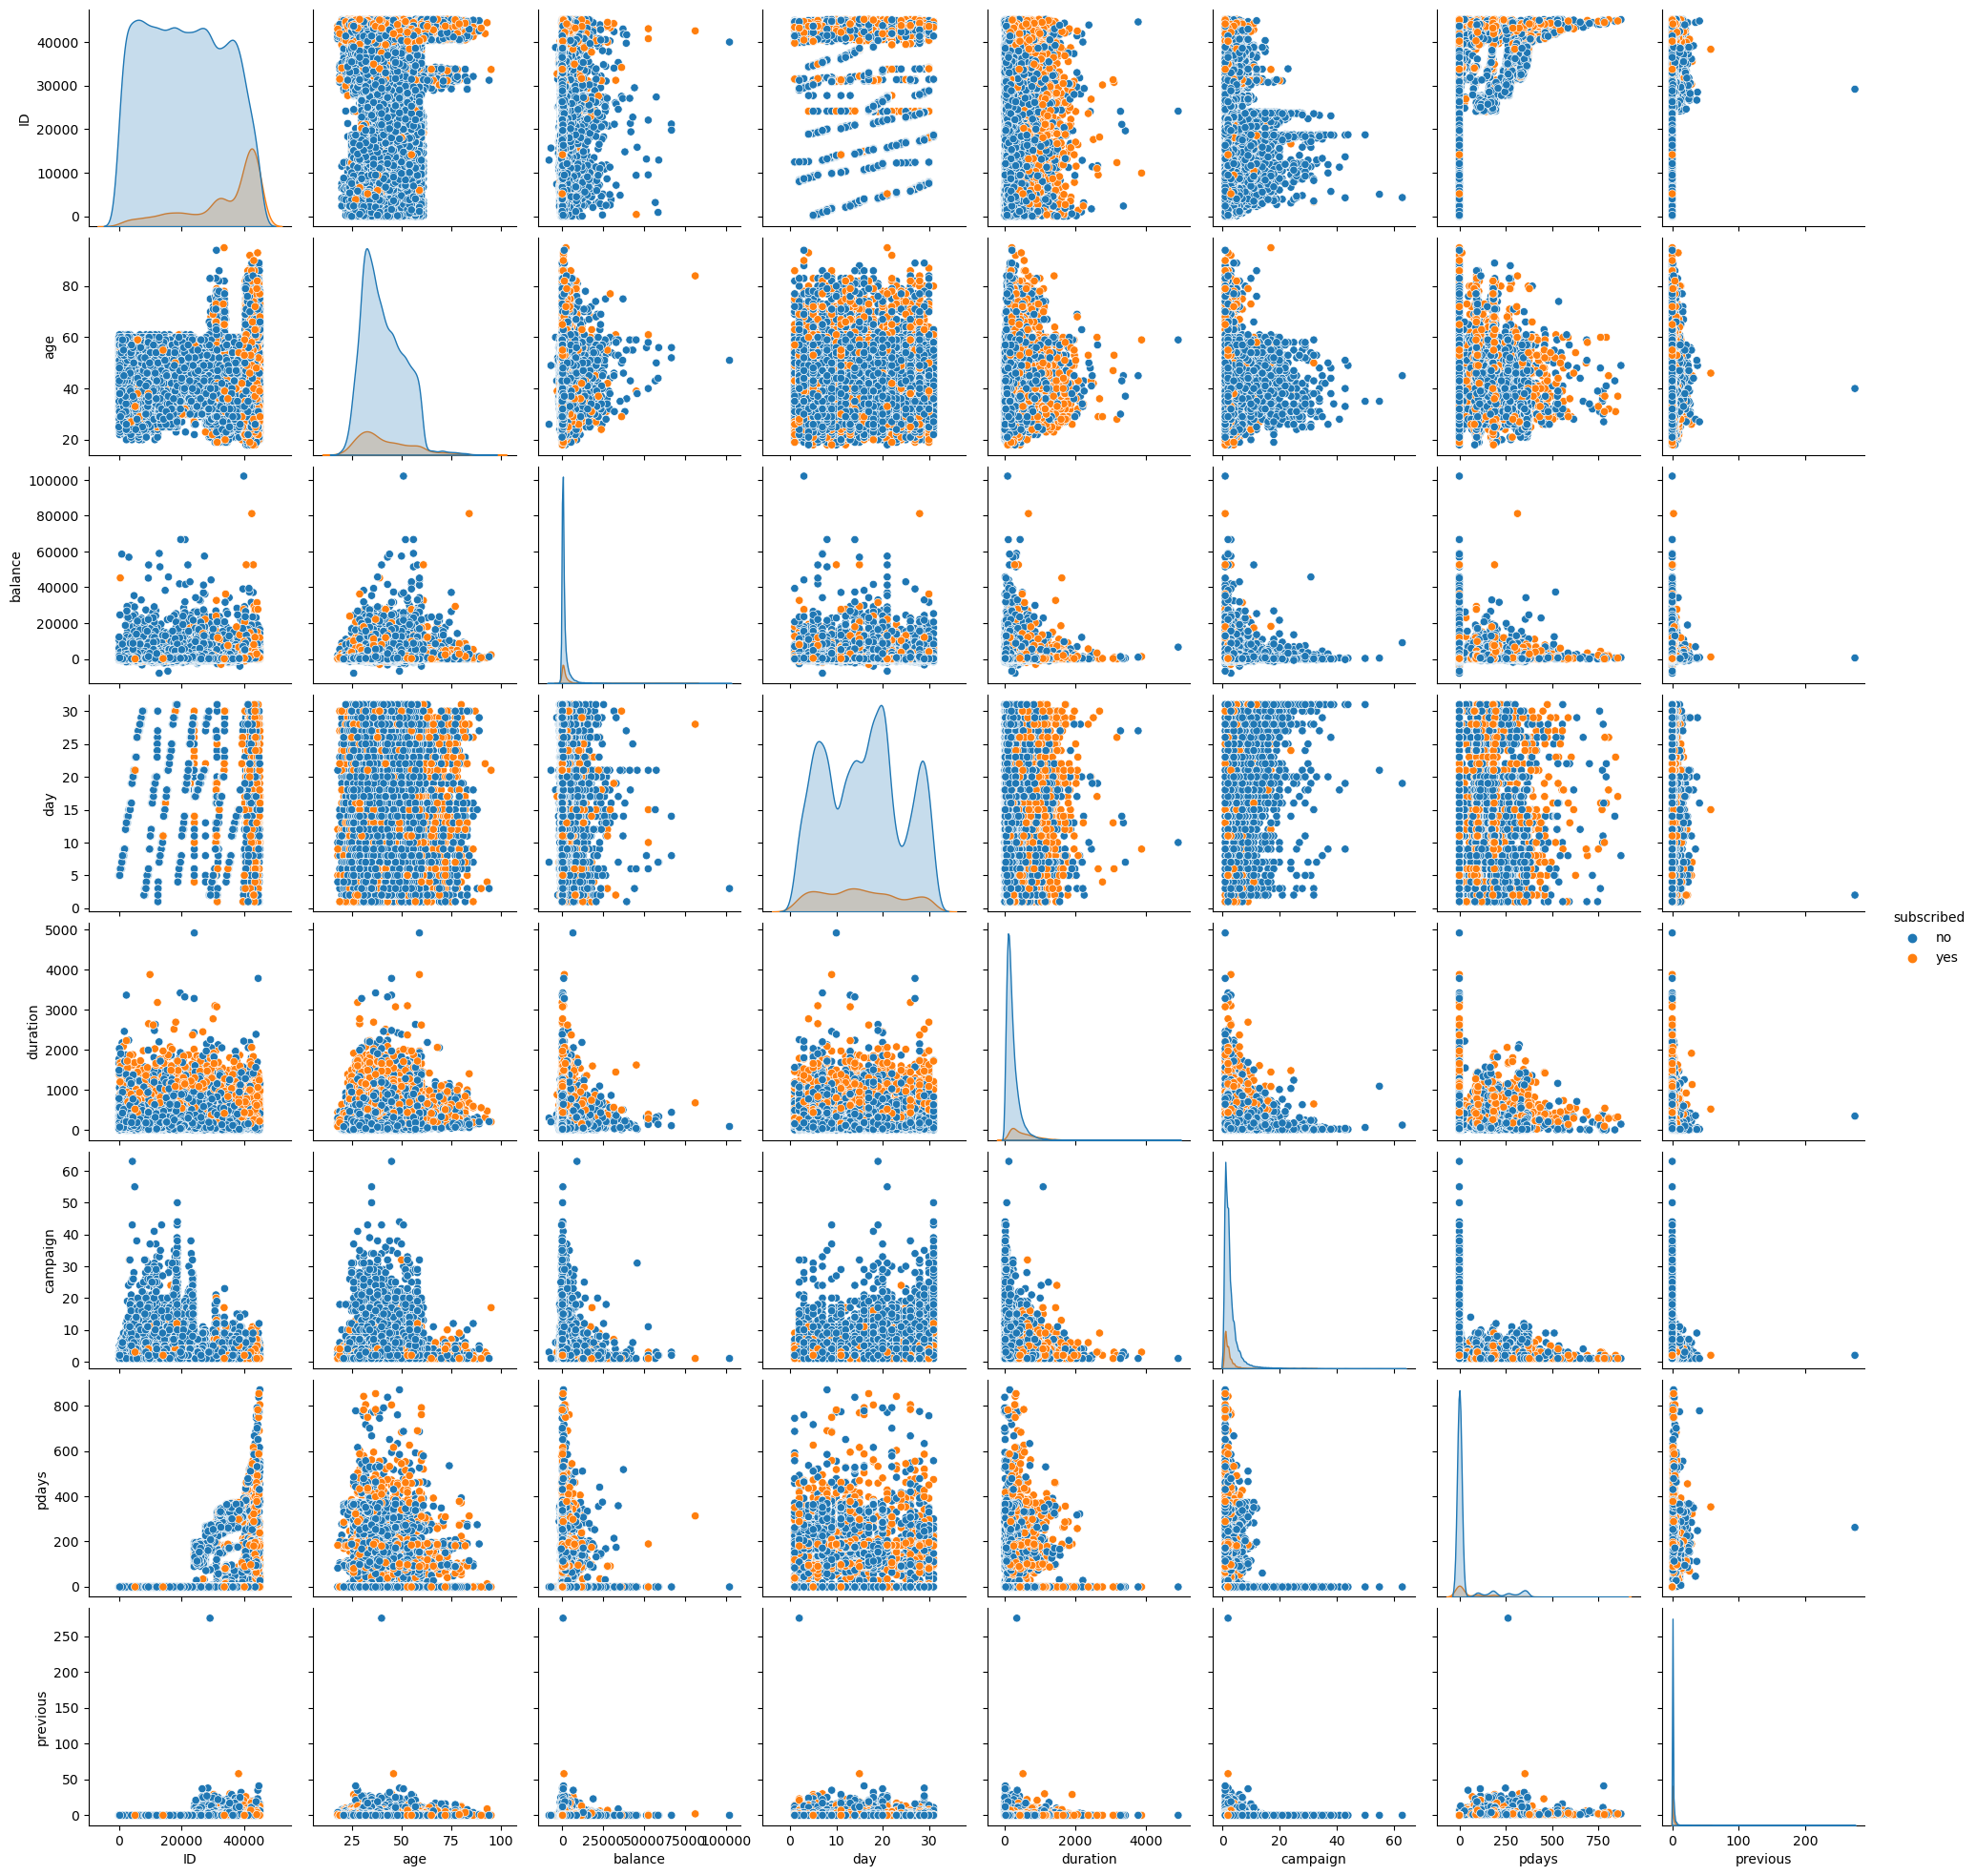

In [84]:
sns.pairplot(trained_url,hue='subscribed',palette='tab10')
plt.show()

In [93]:
train=df_copy.drop('subscribed',axis=1)

In [94]:
train=pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
target=df_copy['subscribed']

In [98]:
Trained_duplicate=trained_url.duplicated().sum()

In [99]:
Trained_duplicate

0

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train, target, test_size=0.3, random_state=42)

In [101]:
trained=pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.xlsx')
test=pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Test.xlsx')

In [104]:
trained

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [105]:
trained.to_csv('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.csv', index=False)


HTTPError: HTTP Error 404: Not Found